In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
class DataAnalysis:
    def __init__(self):
        pass
    # the function that reads and handles the missing values
    def read_and_handle(self):
        DataFile = input('enter the name of the file with extension: ')
        df = pd.read_csv(DataFile)
        #drop columns and rows that have all null values
        nullCol = df.columns[df.isnull().all()]
        df = df.drop(columns=nullCol)
        nullRow = df.index[df.isnull().all(axis=1)]
        df = df.drop(index = nullRow)
        #removing outliers
        df_numCols = df.select_dtypes(include=['number'])
        Q1 = df_numCols.quantile(0.25)
        Q3 = df_numCols.quantile(0.75)
        IQR = Q3 - Q1
        Lbound = Q1 - 1.5 * IQR #the upper bound
        Ubound = Q3 + 1.5 * IQR #the lower bound
        outliers_mask = ((df_numCols >= Lbound) & (df_numCols <= Ubound)).all(axis=1)
        df = df[outliers_mask]
        return df

    def descriptive(self, df):
        #price describtion
        print('Prices:')
        print('Minimum price:', df['price'].min())
        print('Maximum price:', df['price'].max())
        print('Average price:', df['price'].mean())
        #lowest and highest price
        min_price = df[df['price'] == df['price'].min()]
        host_lowest_price = min_price['host_name'].values[0]
        print("Host with the lowest price:", host_lowest_price)
        max_price = df[df['price'] == df['price'].max()]
        host_highest_price = max_price['host_name'].values[0]
        print("Host with the highest price:", host_highest_price)
    
    def visualDescription(self, df):
        _, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
        
        #relationship between calculated_host_listings_count and number_of_reviews
        #Hosts with more listings might have more opportunities for reviews.
        axes[0].scatter(df['calculated_host_listings_count'], df['number_of_reviews'], alpha=0.5)
        axes[0].set_xlabel('Calculated Host Listings Count')
        axes[0].set_ylabel('Number of Reviews')
        axes[0].grid(True)
        axes[0].set_title('host listing vs reviews')
        
        #relationship between price and availability_365
        #Listings with higher availability might have lower prices due to increased competition,
        #while listings with limited availability might command higher prices.
        axes[1].scatter(df['price'], df['availability_365'], alpha=0.5)
        axes[1].set_xlabel('Price')
        axes[1].set_ylabel('Availability_365')
        axes[1].set_title('price vs availability')
        axes[1].grid(True)
      
        # Relationship between number_of_reviews and number_of_reviews_ltm
        #they might indicate the popularity and consistency of a listing over time.
        axes[2].scatter(df['number_of_reviews'], df['number_of_reviews_ltm'], alpha=0.5)
        axes[2].set_xlabel('Number of Reviews')
        axes[2].set_ylabel('Number of Reviews LTM')
        axes[2].set_title('number of reviews vs number of reviews LTM')
        axes[2].grid(True)

        #save plots and print
        plt.savefig('visual_description_plots.png')
        plt.tight_layout()
        plt.show()
        
    def recommendation(self, df) :
        min = df['price'].min()
        max = df['price'].max()
        averagePrice = df['price'].mean()
        
        #reccomend according to the average price 
        if averagePrice < 100 :
            recommendedPrice = averagePrice + 10
        elif averagePrice >= 100 and averagePrice < 200 :
            recommendedPrice = averagePrice + 20
        else :
            recommendedPrice = averagePrice + 30
        print('the recommended price is :',recommendedPrice,'\n\n')
        
        #recommended according to the place
        neighborhoods_prices = df.groupby('neighbourhood')['price'].mean()
        neighborhoods_prices_sorted = neighborhoods_prices.sort_values(ascending=False)
        neighborhoods_highest_prices = neighborhoods_prices_sorted.index.tolist()
        print("recommended to host in these neighbourhood:\n", neighborhoods_highest_prices,'\n\n')
        
        # Plot the count of bookings for each room type
        plt.figure(figsize=(10, 6))
        df['room_type'].value_counts().plot(kind='bar', color='skyblue')
        plt.title('Count of Bookings by Room Type')
        plt.xlabel('Room Type')
        plt.ylabel('Count of Bookings')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.savefig('count_of_bookings_by_room_type.png')#save the imege
        plt.show()
        
        #recommend room type for each niberhood
        roomTcounts = data.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')
        most_requested_roomT = roomTcounts.loc[roomTcounts.groupby('neighbourhood')['count'].idxmax()]
        print('recommend room type for each niberhood:\n',  most_requested_roomT)
        
        #minimum nights that has the highest bookings
        minimum_nights_recommended = df['minimum_nights'].value_counts().idxmax()
        print('recommend minimum nights :', minimum_nights_recommended)
            

enter the name of the file with extension:  listings Portland.csv


Prices:
Minimum price: 30.0
Maximum price: 260.0
Average price: 111.66736183524505
Host with the lowest price: Helen
Host with the highest price: Jason


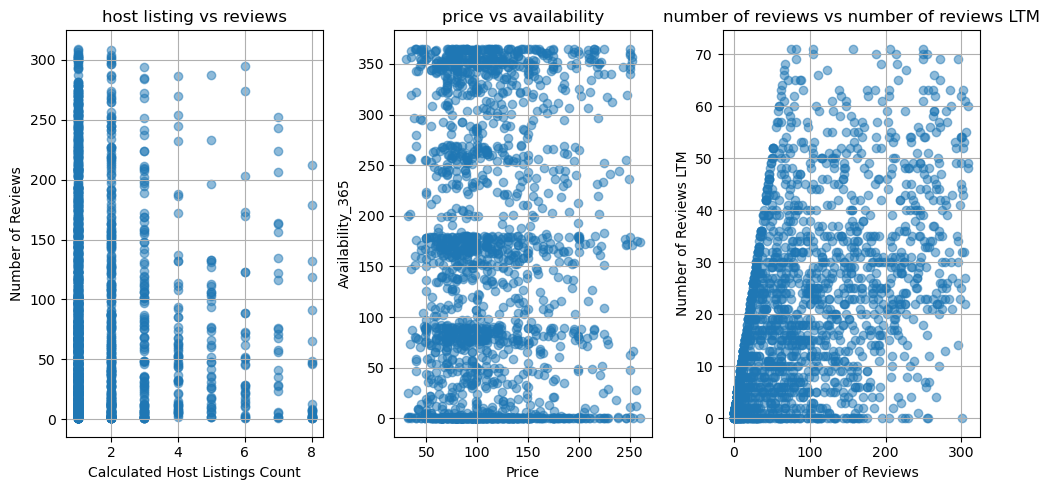

the recommended price is : 131.66736183524506 


recommended to host in these neighbourhood:
 ['Forest Park', 'Pearl', 'Far Southwest', 'Hillside', 'Old Town/Chinatown', 'Southwest Hills', 'Arlington Heights', 'Portland Downtown', 'West Portland Park', 'South Portland', 'Eastmoreland', 'Laurelhurst', 'Sunnyside', 'Northwest District', 'Marshall Park', 'Hosford-Abernethy', 'Humboldt', 'Woodstock', 'East Columbia', 'Woodlawn', 'Boise', 'Ardenwald-Johnson Creek', 'South Tabor', 'Buckman', 'Cathedral Park', 'Concordia', 'Overlook', 'University Park', 'King', 'St. Johns', 'Cully', 'Eliot', 'Sunderland', 'Goose Hollow', 'Kerns', 'Sellwood-Moreland Improvement League', 'Maplewood', 'Irvington', 'Piedmont', 'Richmond', 'Vernon', 'Kenton', "Sullivan's Gulch", 'Roseway', 'Mt. Tabor', 'Hillsdale', 'Hayhurst', 'South Burlingame', 'Portsmouth', 'Brentwood-Darlington', 'Arnold Creek', 'Arbor Lodge', 'Brooklyn Action Corps', 'Sabin', 'Rose City Park', 'Pleasant Valley', 'Montavilla', 'Crestwood', 'Pa

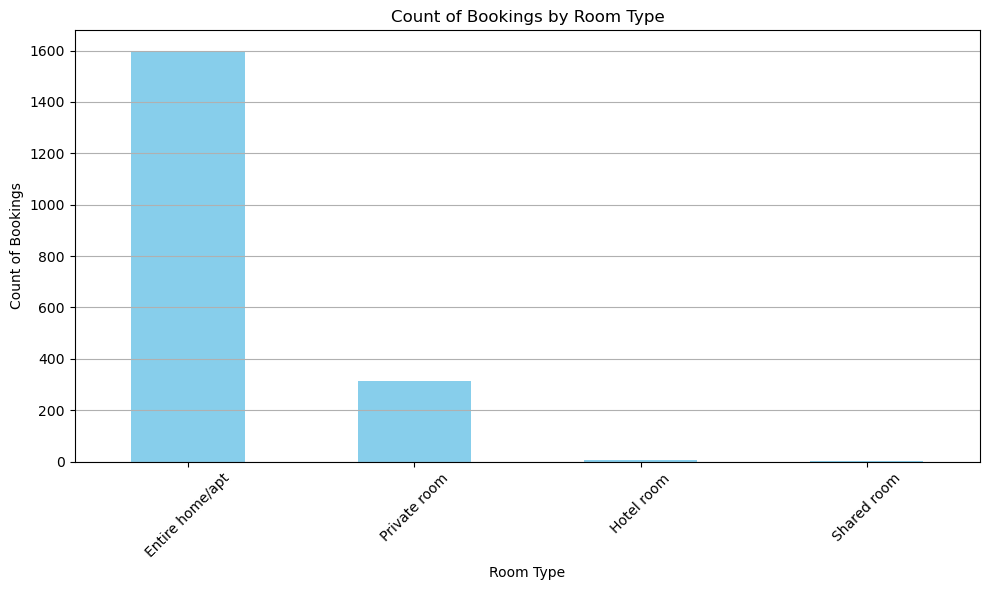

recommend room type for each niberhood:
                neighbourhood        room_type  count
0                    Alameda  Entire home/apt      8
1                Arbor Lodge  Entire home/apt     22
3    Ardenwald-Johnson Creek  Entire home/apt      2
4          Arlington Heights  Entire home/apt      3
6               Arnold Creek  Entire home/apt      2
..                       ...              ...    ...
142          University Park  Entire home/apt     17
144                   Vernon  Entire home/apt     30
146       West Portland Park  Entire home/apt      7
148                 Woodlawn  Entire home/apt     26
150                Woodstock  Entire home/apt     32

[81 rows x 3 columns]
recommend minimum nights : 2


In [46]:
#creating an instance of the class and use its methods
data_analysis = DataAnalysis()
data = data_analysis.read_and_handle()
data_analysis.descriptive(data)
data_analysis.visualDescription(data)
data_analysis.recommendation(data)